In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread('./data/IU.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

grid_size = (250,250)

In [13]:
def create_grid(img, grid_size):
    height, width = img.shape[:2]
    grid_width, grid_height = grid_size
    
    # 그리드 생성
    grid_img = np.copy(img)
    for x in range(0, width, grid_width):
        cv2.line(grid_img, (x,0), (x,height), (0, 255, 0), 3)
    for y in range(0, height, grid_height):
        cv2.line(grid_img, (0,y), (width, y), (0, 255, 0), 3)
    
    return grid_img

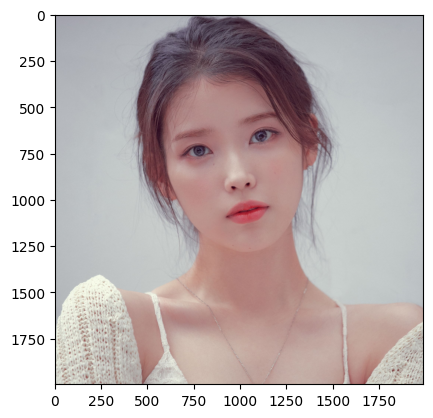

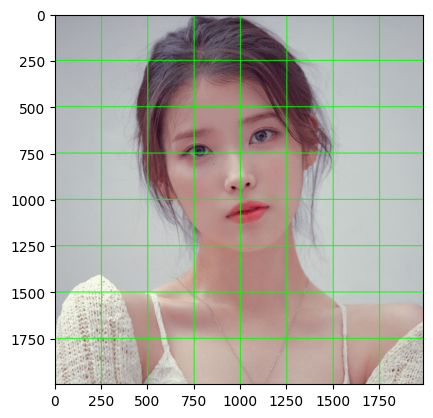

In [16]:
grid_img = create_grid(img, grid_size)
plt.imshow(img)
plt.show()
plt.imshow(grid_img)
plt.show()

# 그리드 이미지 분할

In [17]:
import torchvision.transforms as transforms
from PIL import Image

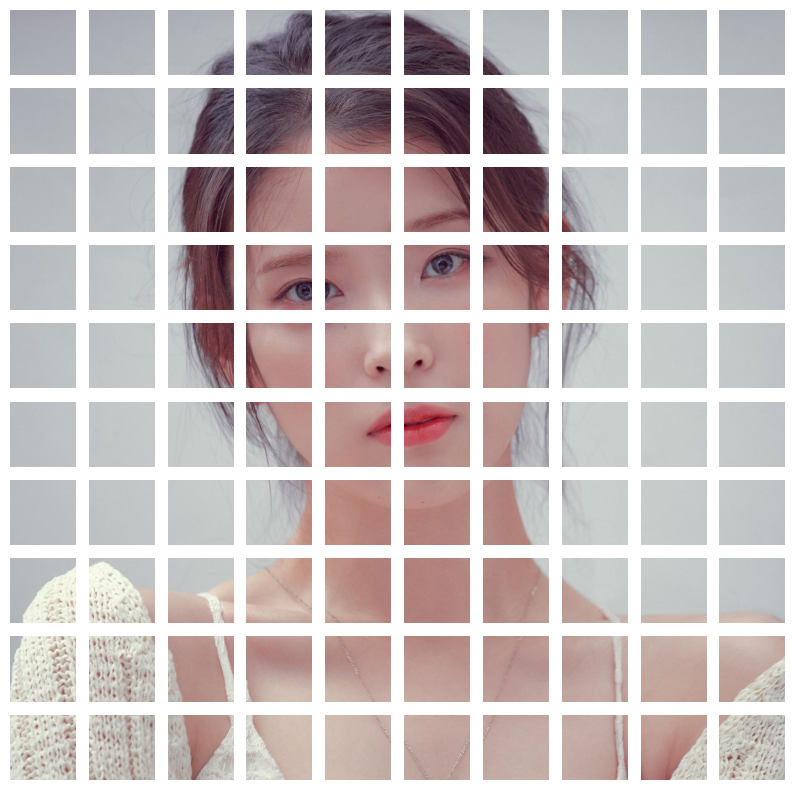

In [19]:
img_path = './data/IU.jpg'
img = Image.open(img_path)

# transform img to pytorch tensor
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img).float()

# 그리드 생성 + 크기 조정
grid_size = 10
height, width = img_tensor.shape[1], img_tensor.shape[2]
grid_width = width // grid_size
grid_height = height // grid_size

grids = []
for i in range(grid_size):
    for j in range(grid_size):
        x_min = j * grid_width
        y_min = i * grid_height
        x_max = (j+1) * grid_width
        y_max = (i+1) * grid_height
        grid = img_tensor[:, y_min:y_max, x_min:x_max]
        grids.append(grid)
        
fig, axis = plt.subplots(grid_size, grid_size, figsize=(10,10))

for i in range(grid_size):
    for j in range(grid_size):
        axis[i, j].imshow(grids[i * grid_size + j].permute(1,2,0))
        axis[i, j].axis('off')
        
plt.show()